<a href="https://colab.research.google.com/github/FZgabor/ML2025/blob/main/MLbeadando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/train.csv") # adatok betöltése

numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
object_cols = [cname for cname in df.columns if df[cname].dtype in ['object']]

object_cols.append('target_reg')
num_data = df[numerical_cols].dropna()


y = num_data['target_reg'] #classifier
X = num_data.drop(['target_reg'], axis = 1) # X,y beállítása

In [24]:
X.head()

,id,KATEGORIKUS_VALTOZO_2014,KATEGORIKUS_VALTOZO_2015,KATEGORIKUS_VALTOZO_2016,aktelh_2014,aktelh_2015,aktelh_2016,aktsajt_2014,aktsajt_2015,aktsajt_2016,...,rovkot_2016,rszem_2014,rszem_2015,rszem_2016,sajattok_2014,sajattok_2015,sajattok_2016,targyie_2014,targyie_2015,targyie_2016
0,1,0,0,0,457724.0,586098.0,643830.0,535126.0,849583.0,1234907.0,...,17326862.0,10244187.0,10726882.0,11271908.0,13450028.0,13883334.0,14386576.0,107131440.0,130146063.0,156391175.0
1,2,0,0,0,49.0,720.0,421.0,0.0,0.0,0.0,...,3496.0,11494.0,10583.0,10506.0,30300.0,33324.0,33258.0,2806.0,9464.0,7518.0
2,3,0,0,0,80.0,538.0,680.0,0.0,0.0,0.0,...,261437.0,41030.0,43769.0,44200.0,185435.0,190736.0,259307.0,162589.0,155789.0,152413.0
3,4,0,0,0,203.0,265.0,232.0,0.0,0.0,0.0,...,3340.0,10629.0,10892.0,11999.0,7850.0,8395.0,8582.0,26155.0,24763.0,25364.0
4,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,14777.0,8787.0,6172.0,6457.0,-287.0,-782.0,-2780.0,10319.0,8467.0,6614.0


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # adatok standardizálása 0 átlag 1 szórás
X_std = pd.DataFrame(scaler.fit_transform(X))


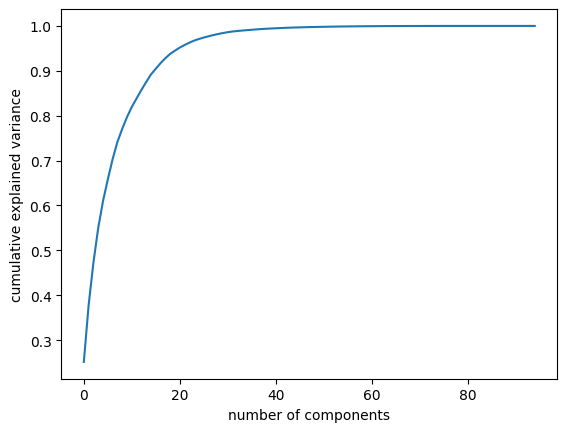

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(0.95).fit(X_std)
pca.n_components_

np.int64(21)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(20)
df_pca= pca.fit_transform(X_std)
#pca.components_

In [29]:
pca.explained_variance_ratio_

array([0.2515385 , 0.12616439, 0.09500202, 0.0771211 , 0.05998964,
       0.04812379, 0.04527425, 0.03825791, 0.02917088, 0.02629535,
       0.02257873, 0.01902108, 0.01875618, 0.01773362, 0.01689886,
       0.01272106, 0.01248232, 0.01098776, 0.00968484, 0.00712078])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=400,
    max_depth=18,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

forest.fit(X_train, y_train)



RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [36]:
from sklearn.metrics import mean_absolute_error

pred = forest.predict(X_test)
MAE = mean_absolute_error(y_test, pred)
MAE

81788.97574438805

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear = LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train)
predlin = linear.predict(X_test)
MAELR = mean_absolute_error(y_test, predlin)
print(MAELR)

91694.41511596213


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=4,
    random_state=42
)


In [41]:
gbr.predict(X_test)
mae=mean_absolute_error(y_test, gbr.predict(X_test))
mae

53446.332256109294